In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()

In [3]:
#get deteministic random numbers
rng=np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
#add noise to the data
#the first 30 features are from the dataset and the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test=train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

#use f_classif adn selectPercentile to select 50% of the features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
#tranform training ser
X_train_selected= select.transform(X_train)
print("X_train_shape", format(X_train.shape))
print("X_train_selected shape", format(X_train_selected.shape))

X_train_shape (284, 80)
X_train_selected shape (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

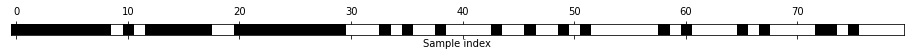

In [6]:
#we can find which feature has been selected using get_support method
mask=select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [ ]:
'''
From the visualization it can be seen that most of the selected features are the original features
and most of the noise features are removed. however recovery of the original fearture is not perfect
'''

In [11]:
X_test_selected = select.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all feature", format(lr.score(X_test, y_test)))
lr.fit(X_test_selected, y_test)
print("Score with only selected features", format(lr.score(X_test_selected, y_test)))


Score with all feature 0.9192982456140351
Score with only selected features 0.9578947368421052


C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [ ]:
'''
Here teh noise feature improved performance even though some original data is lost.
Univariate feature selection can still be very helpful if there is such a large number of features
that building a model on is infeasible
'''